In [17]:
from importlib import reload ,import_module
import module.utilize as utilize
import module.singleVariant as singleVariant
import module.multiVariant as multiVariant
import numpy as np
from numba import njit,jit, float32
reload(utilize)
reload(multiVariant)
reload(singleVariant)

attribute_names=np.array(["SALT","TEMP"])

all_ensamble_data=np.empty([0,60,50,50,50])
for name in attribute_names:
    data=utilize.readRedSeaFile(name)
    data=data.reshape(1,60,50,50,50)
    all_ensamble_data=np.append(all_ensamble_data,data,axis=0)

all_ensamble_data.shape

covBlockSize=5
dataBlockSize=5
binsNumber=64
sizeZ=30
sizeY=30
sizeX=30
#print(all_ensamble_data[0,1,:,:,:])

conditions=np.array([[36,40],[26,30]])

copulaModel=multiVariant.multiDistCopula3D(all_ensamble_data,dataBlockSize,covBlockSize,binsNumber,allDataSize=[sizeZ,sizeY,sizeX])


copulaModel.calProbByConditionGT(conditions,sizeZ=sizeZ,sizeY=sizeY,sizeX=sizeX)
copulaModel.fit()
copulaModel.getNonZeroBinsCounts()



copulaModel.calProbByCondition(conditions,sizeZ=sizeZ,sizeY=sizeY,sizeX=sizeX)


v0 non zero bins count: 2.3333333333333335
v1 non zero bins count: 4.319444444444445


(1000, 2)


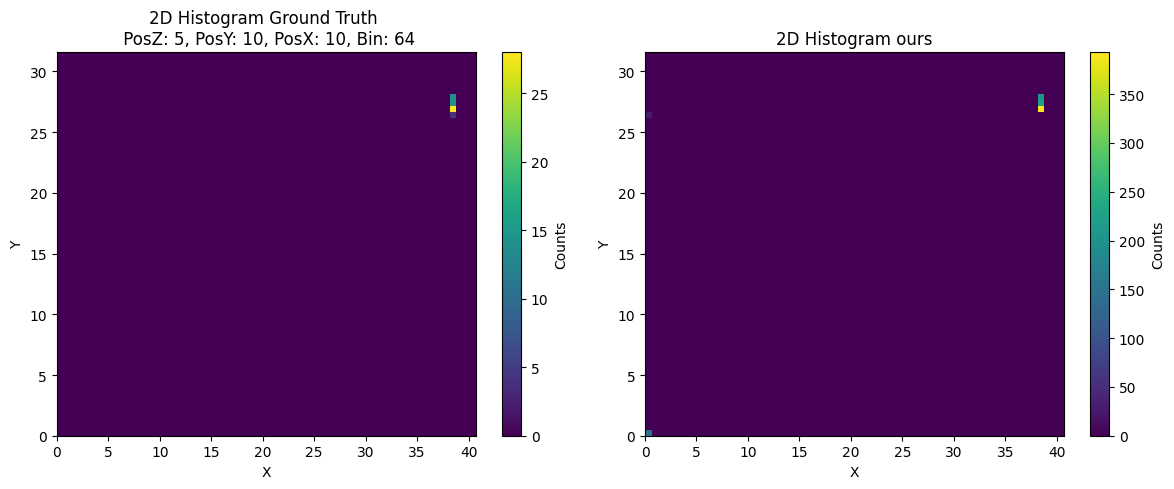

In [ ]:
posZ=5
posY=10
posX=10

copulaModel.vis2DHistogram(posZ,posY,posX)

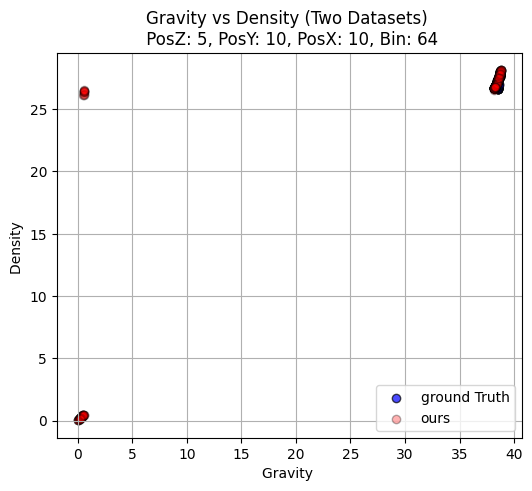

In [19]:
copulaModel.vis2DScatterplot(posZ,posY,posX,size=300)